In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

from citipy import citipy

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Starting URL for Weather Map API Call. (units=Imperial) added to select the display units.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=621771d9ca5f631438d7afe0d997db98'

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [5]:
# Add the latitudes and longitudes to a list
coordinates = list(lats_lngs)
coordinates

[(52.88897756423066, 129.0402877775404),
 (62.84525937440151, 173.00103775221316),
 (-34.35614525614687, -123.13154028401206),
 (78.20632686460849, 98.6054862657806),
 (-40.856768539635105, -29.17417285584804),
 (-85.27521166663958, 29.09126510121564),
 (30.146127421190968, -11.290294084867128),
 (-36.93060696026774, 21.91265014467595),
 (75.87286158188073, 49.38120749750851),
 (11.76992013808885, 176.3056402292076),
 (83.87001367434965, 163.2898642410242),
 (1.6359015508286063, 132.83164302201135),
 (48.307718848311765, 28.097771711644327),
 (43.96910462027276, -90.48968291879903),
 (19.90215901072625, -101.10186053383441),
 (38.21438856356838, 117.31040424663456),
 (20.944621773131345, 36.19878135515728),
 (-67.5259299413033, -98.44100154184528),
 (-4.623114162049546, 94.41984770925785),
 (-87.24553834541987, 97.73271353197646),
 (89.87569356914179, -154.05087656906764),
 (0.7269721747262423, -44.90105856814756),
 (-79.08354317854051, -83.08540106270539),
 (-49.96293509059245, -124.7

In [6]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the citiy count to confirm sufficient count
len(cities)

616

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# print statement that references the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# create counters for the record numbers, 1–50; and the set counter.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                             "Country": city_country,
                            "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shimanovsk
Processing Record 2 of Set 1 | anadyr
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | kruisfontein
Processing Record 7 of Set 1 | tiznit
Processing Record 8 of Set 1 | george
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | manokwari
Processing Record 13 of Set 1 | dzyhivka
Processing Record 14 of Set 1 | onalaska
Processing Record 15 of Set 1 | alvaro obregon
Processing Record 16 of Set 1 | cangzhou
Processing Record 17 of Set 1 | sawakin
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | padang
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | carutapera


Processing Record 37 of Set 4 | taruma
Processing Record 38 of Set 4 | nueve de julio
Processing Record 39 of Set 4 | coquimbo
Processing Record 40 of Set 4 | mbaiki
Processing Record 41 of Set 4 | nordhausen
Processing Record 42 of Set 4 | los llanos de aridane
Processing Record 43 of Set 4 | mouila
Processing Record 44 of Set 4 | cuamba
Processing Record 45 of Set 4 | nalut
Processing Record 46 of Set 4 | menomonie
Processing Record 47 of Set 4 | butte
Processing Record 48 of Set 4 | yulara
Processing Record 49 of Set 4 | nokaneng
Processing Record 50 of Set 4 | zhumadian
Processing Record 1 of Set 5 | san juan
Processing Record 2 of Set 5 | thompson
Processing Record 3 of Set 5 | klaksvik
Processing Record 4 of Set 5 | bandarbeyla
Processing Record 5 of Set 5 | beringovskiy
Processing Record 6 of Set 5 | darhan
Processing Record 7 of Set 5 | dharchula
Processing Record 8 of Set 5 | borshchiv
Processing Record 9 of Set 5 | kulhudhuffushi
Processing Record 10 of Set 5 | grand-santi
Pr

Processing Record 28 of Set 8 | jalu
Processing Record 29 of Set 8 | santa luzia
Processing Record 30 of Set 8 | payo
Processing Record 31 of Set 8 | alakurtti
Processing Record 32 of Set 8 | cockburn town
Processing Record 33 of Set 8 | teguldet
Processing Record 34 of Set 8 | salinopolis
Processing Record 35 of Set 8 | ust-shonosha
Processing Record 36 of Set 8 | lumsden
Processing Record 37 of Set 8 | awjilah
Processing Record 38 of Set 8 | alta floresta
Processing Record 39 of Set 8 | karratha
Processing Record 40 of Set 8 | kununurra
Processing Record 41 of Set 8 | jennings
Processing Record 42 of Set 8 | naters
Processing Record 43 of Set 8 | adre
Processing Record 44 of Set 8 | makakilo city
Processing Record 45 of Set 8 | itarema
Processing Record 46 of Set 8 | port lincoln
Processing Record 47 of Set 8 | namatanai
Processing Record 48 of Set 8 | boguchar
Processing Record 49 of Set 8 | turayf
Processing Record 50 of Set 8 | evensk
Processing Record 1 of Set 9 | san lawrenz
Pro

Processing Record 18 of Set 12 | baft
Processing Record 19 of Set 12 | bac lieu
Processing Record 20 of Set 12 | paredon
Processing Record 21 of Set 12 | maridi
Processing Record 22 of Set 12 | itoman
Processing Record 23 of Set 12 | komsomolskiy
Processing Record 24 of Set 12 | malpur
Processing Record 25 of Set 12 | mishkino
Processing Record 26 of Set 12 | khomutovo
Processing Record 27 of Set 12 | maine-soroa
Processing Record 28 of Set 12 | yelkhovka
Processing Record 29 of Set 12 | turochak
Processing Record 30 of Set 12 | san juan de uraba
Processing Record 31 of Set 12 | sokna
Processing Record 32 of Set 12 | talas
Processing Record 33 of Set 12 | oranjestad
Processing Record 34 of Set 12 | saquena
Processing Record 35 of Set 12 | grand gaube
Processing Record 36 of Set 12 | charleston
Processing Record 37 of Set 12 | manama
Processing Record 38 of Set 12 | sitka
Processing Record 39 of Set 12 | togur
Processing Record 40 of Set 12 | ribeira brava
Processing Record 41 of Set 12

In [8]:
len(city_data)

574

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shimanovsk,52.0000,127.7000,7.20,92,100,8.66,RU,2021-12-11 20:49:55
1,Anadyr,64.7500,177.4833,-23.30,69,0,8.95,RU,2021-12-11 20:49:55
2,Rikitea,-23.1203,-134.9692,75.94,75,90,16.53,PF,2021-12-11 20:49:19
3,Khatanga,71.9667,102.5000,-43.40,100,59,4.45,RU,2021-12-11 20:49:56
4,Arraial Do Cabo,-22.9661,-42.0278,82.36,78,0,11.50,BR,2021-12-11 20:49:56
5,Kruisfontein,-34.0033,24.7314,63.88,68,100,2.64,ZA,2021-12-11 20:49:56
6,Tiznit,29.5833,-9.5000,59.83,36,0,2.35,MA,2021-12-11 20:49:57
7,George,-33.9630,22.4617,62.15,82,75,2.30,ZA,2021-12-11 20:48:59
8,Butaritari,3.0707,172.7902,82.58,74,100,17.07,KI,2021-12-11 20:49:57
9,Cherskiy,68.7500,161.3000,-45.00,100,41,4.25,RU,2021-12-11 20:49:57


In [10]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shimanovsk,RU,2021-12-11 20:49:55,52.0000,127.7000,7.20,92,100,8.66
1,Anadyr,RU,2021-12-11 20:49:55,64.7500,177.4833,-23.30,69,0,8.95
2,Rikitea,PF,2021-12-11 20:49:19,-23.1203,-134.9692,75.94,75,90,16.53
3,Khatanga,RU,2021-12-11 20:49:56,71.9667,102.5000,-43.40,100,59,4.45
4,Arraial Do Cabo,BR,2021-12-11 20:49:56,-22.9661,-42.0278,82.36,78,0,11.50
5,Kruisfontein,ZA,2021-12-11 20:49:56,-34.0033,24.7314,63.88,68,100,2.64
6,Tiznit,MA,2021-12-11 20:49:57,29.5833,-9.5000,59.83,36,0,2.35
7,George,ZA,2021-12-11 20:48:59,-33.9630,22.4617,62.15,82,75,2.30
8,Butaritari,KI,2021-12-11 20:49:57,3.0707,172.7902,82.58,74,100,17.07
9,Cherskiy,RU,2021-12-11 20:49:57,68.7500,161.3000,-45.00,100,41,4.25


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1639257203.0701194

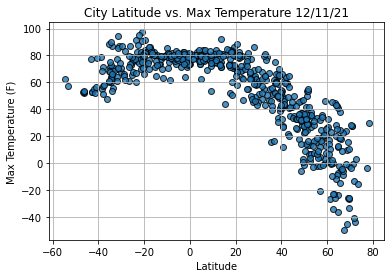

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

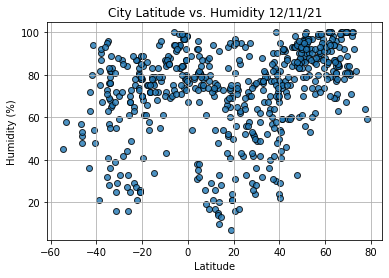

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

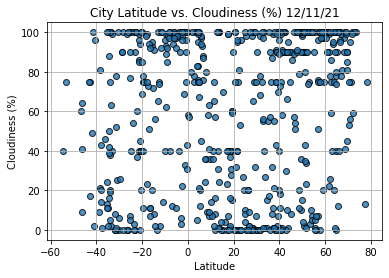

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

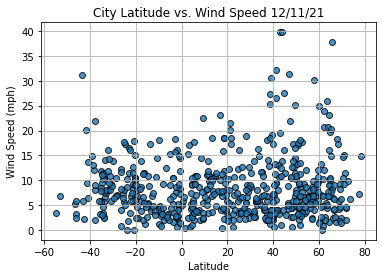

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()